In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

there are 768 rows and 9 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


BMI & DiabetesPedigreeFunction are continous variables remaining  all are discrete variables.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
for i in df.select_dtypes(include='int64'):
    print('no of observations in each catagory of',i,' \n',df[i].value_counts())
    print('percentage of  observations in each catagory of',i,' \n',df[i].value_counts(normalize=True)**100)
    

no of observations in each catagory of Pregnancies  
 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
percentage of  observations in each catagory of Pregnancies  
 1      3.142352e-76
0      9.912333e-85
2      5.592429e-88
3     9.332636e-102
4     5.185245e-106
5     1.125547e-113
6     2.295506e-119
7     6.097185e-124
8     2.768456e-131
9     1.512450e-144
10    3.054936e-151
11    4.010020e-185
13    2.909900e-189
12    7.729100e-194
14    3.688736e-259
15    2.909900e-289
17    2.909900e-289
Name: Pregnancies, dtype: float64
no of observations in each catagory of Glucose  
 100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
percentage of  observations in each catagory of Glucose  
 100    3.226786e-166
99     3.226786e-166
129  

## checking null values

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

# checking duplicate values

In [9]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
there are no duplicate values too.

SyntaxError: invalid syntax (<ipython-input-10-9f9bab7dd56b>, line 1)

## check for outliers

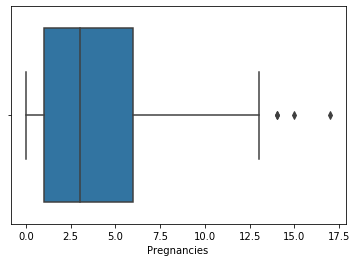

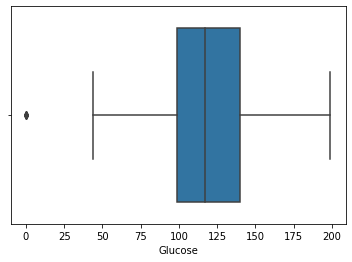

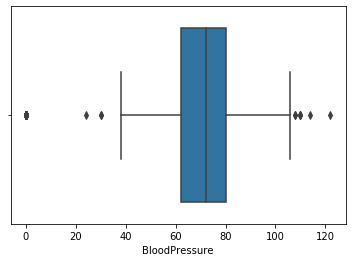

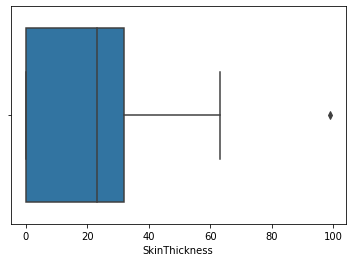

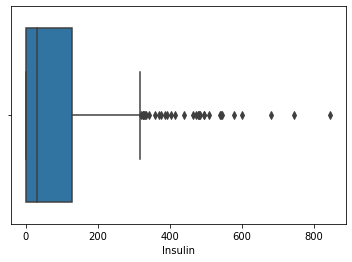

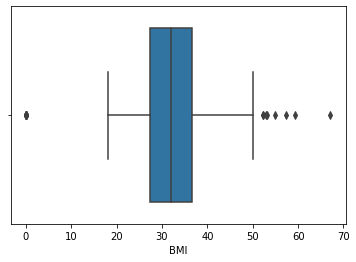

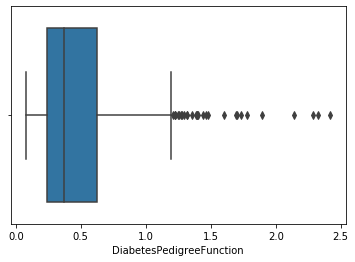

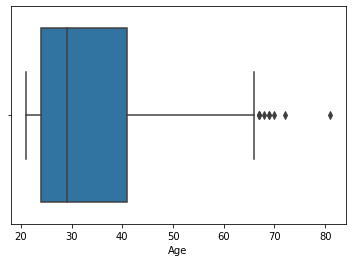

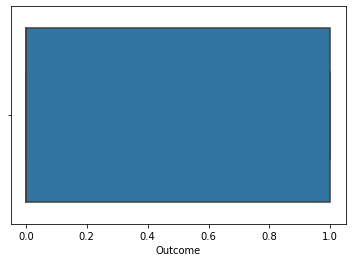

In [11]:
for i in df.select_dtypes(include=['int64','float64']):
    sns.boxplot(df[i])
    plt.show()


There are more outliers in Insulin and Diabetic boold pressure and a very few outliers in all others.

In [12]:
df.Outcome.value_counts(normalize= True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

we have 65:34 ratio which is way imbalanced but not a severe imbalanced dataset.

## 2. Data Preparation (10 marks) 

a.Fix the defects found above and do appropriate treatment if any. (3 marks) 

 The defect that found areoutliers, which can be treated pending on the bussiness domain knowledge, so we need to confirm with domain expert before treating outliers , to know whether the outlier we feel is reall anoutlier or not.

In [20]:
for i in df.select_dtypes(include=['int64','float64']):
    q1 =df[i].quantile(0.25)
    q3 =df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 -1.5*iqr
    df1[i] =df[(df[i]<=ul) & (df[i]>=ll)][i]
    print(df1.shape)

(636, 9)
(636, 9)
(636, 9)
(636, 9)
(636, 9)
(636, 9)
(636, 9)
(636, 9)
(636, 9)


In [21]:
df1.isna().sum()

Pregnancies                 0
Glucose                     9
BloodPressure               4
SkinThickness               0
Insulin                     9
BMI                         2
DiabetesPedigreeFunction    9
Age                         2
Outcome                     0
dtype: int64

In [29]:
from sklearn.impute import KNNImputer
knimpute =KNNImputer()
knafterimpute =knimpute.fit_transform(df)

In [33]:
df1 =pd.DataFrame(knafterimpute,columns= df.columns)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


we used knn imputer to treat the outliers.

In [ ]:
b. Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (3 marks) 

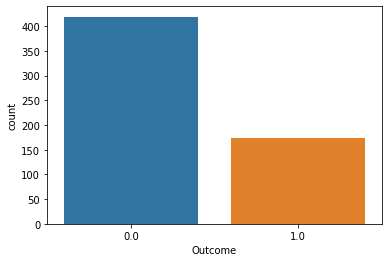

In [34]:
sns.countplot(df1.Outcome)

In [ ]:
we can see the count of target variable.

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               592 non-null    float64
 1   Glucose                   592 non-null    float64
 2   BloodPressure             592 non-null    float64
 3   SkinThickness             592 non-null    float64
 4   Insulin                   592 non-null    float64
 5   BMI                       592 non-null    float64
 6   DiabetesPedigreeFunction  592 non-null    float64
 7   Age                       592 non-null    float64
 8   Outcome                   592 non-null    float64
dtypes: float64(9)
memory usage: 41.8 KB
